In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
repo_weights = pd.read_csv('./data/repo_weights.csv')

In [19]:
repo_weights.columns = ['repo', 'weight_followers', 'weight_stargazers', 'weight_avg', 'total_stargazers']

In [47]:
# remove angles
repo_weights = repo_weights[repo_weights['repo'] != 'angle']

In [22]:
repo_weights.to_csv('./data/repo_weights.csv', index=False)

In [5]:
len(repo_weights.repo.unique())

707

In [6]:
repo_weights.head()

,repo,weight_followers,weight_stargazers,weight_avg,total_stargazers
0,google-api-java-client,113.097561,151.343284,132.220422,474
1,distributedlog,768.658537,812.567164,790.612850,2009
2,shoulda-matchers,763.243902,791.223881,777.233892,1783
3,fathom,588.243902,566.985075,577.614489,1277
4,Tropos,521.414634,553.328358,537.371496,1332


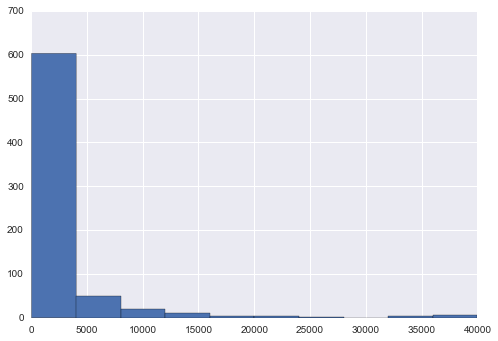

In [88]:
repo_weights['total_stargazers'].hist()

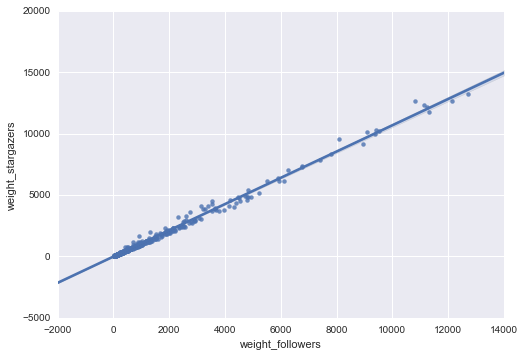

In [31]:
sns.regplot(x='weight_followers', y='weight_stargazers', data=repo_weights)

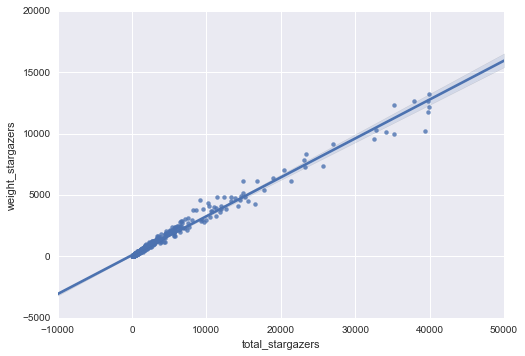

In [33]:
sns.regplot(x='total_stargazers', y='weight_stargazers', data=repo_weights)

- Weighted followers follow a linear relationship with total weighted stargazers
- Weights design basically follow a linear relationship with total stargazers

### The past 51 weeks

In [37]:
starrings_full51_group = pd.read_csv('./data/starrings_full51_group.csv')

In [41]:
len(starrings_full51_group['repo'] == 'angle')

27064

In [39]:
len(starrings_full51_group['repo'].unique())

705

In [46]:
# remove angles
starrings_full51_group = starrings_full51_group[starrings_full51_group['repo'] != 'angle']
len(starrings_full51_group['repo'].unique())

704

In [45]:
starrings_full51_group.head()

,owner,repo,weekofyear,total_stars
0,BVLC,caffe,1,14
1,BVLC,caffe,2,99
2,BVLC,caffe,3,96
3,BVLC,caffe,4,132
4,BVLC,caffe,5,120


In [ ]:
starrings_full51_group['total_stars_pre'] = starrings_full51_group['total_stars'].apply(lambda i)

In [49]:
owner_repo = starrings_full51_group[['owner', 'repo']].drop_duplicates()

In [128]:
starrings_full50_growth = pd.DataFrame()
i = 1
for index, row in owner_repo.iterrows():
    if i % 100 == 0:
        print 'Already {} repos'.format(i)
    slot = starrings_full51_group[(starrings_full51_group['owner'] == row['owner']) & (starrings_full51_group['repo'] == row['repo'])]
    first50 = slot['total_stars'].iloc[:-1]
    slot = slot.iloc[1:]
    slot['prior'] = first50.tolist()
    slot['growth'] = slot['total_stars'] - slot['prior']
    starrings_full50_growth = pd.concat([starrings_full50_growth, slot], axis=0)
    i += 1

Already 100 repos
Already 200 repos
Already 300 repos
Already 400 repos
Already 500 repos
Already 600 repos
Already 700 repos


In [129]:
starrings_full50_growth.shape

(26358, 6)

In [130]:
starrings_full50_growth.head()

,owner,repo,weekofyear,total_stars,prior,growth
1,BVLC,caffe,2,99,14.0,85.0
2,BVLC,caffe,3,96,99.0,-3.0
3,BVLC,caffe,4,132,96.0,36.0
4,BVLC,caffe,5,120,132.0,-12.0
5,BVLC,caffe,6,192,120.0,72.0


In [131]:
starrings_full50_growth.to_csv('./data/starrings_full50_growth.csv', index=False)

In [7]:
starrings_full50_growth = pd.read_csv('./data/starrings_full50_growth.csv')

In [33]:
# remove two repos with the same name of 'angle'
starrings_full50_growth = starrings_full50_growth[starrings_full50_growth['repo'] != 'angle']
starrings_full50_growth.head()

,owner,repo,weekofyear,total_stars,prior,growth
0,BVLC,caffe,2,99,14.0,85.0
1,BVLC,caffe,3,96,99.0,-3.0
2,BVLC,caffe,4,132,96.0,36.0
3,BVLC,caffe,5,120,132.0,-12.0
4,BVLC,caffe,6,192,120.0,72.0


In [36]:
len(starrings_full50_growth['repo'].unique())

700

In [54]:
starrings_full50_growth_mean = starrings_full50_growth.groupby(by=['owner', 'repo'])['growth'].mean().reset_index()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fd69490>]], dtype=object)

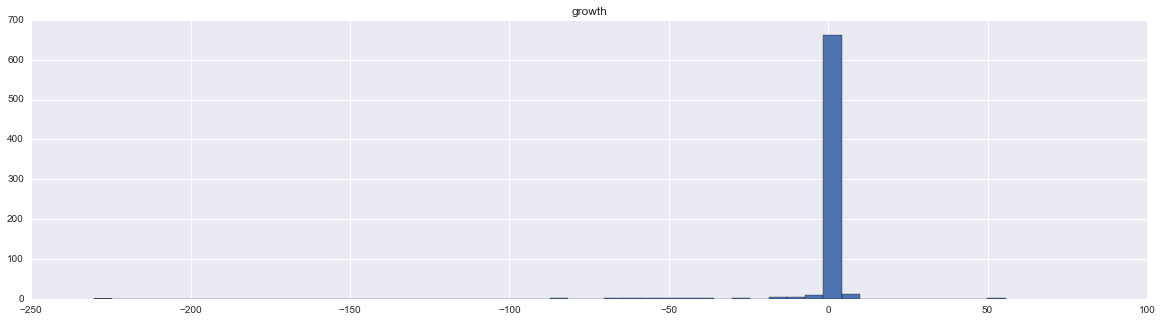

In [55]:
starrings_full50_growth_mean.hist(bins=50, figsize=(20,5))

- Most repos has the median growth between -10 to 10

## Repo static attributes with homepages

In [76]:
repos_static = pd.read_csv('./data/repos-with-homepage.csv', index_col='Unnamed: 0')

In [77]:
repos_static.head()

,org_id,repo_id,name,full_name,fork,forks_count,size,has_issues,has_wiki,language,stargazers_count,watchers_count,created_at,updated_at,homepage
1,google,196334,upb,google/upb,False,93,5259,True,True,C,694,694,2009-05-09 02:38:42,2016-09-21 21:30:28,https://github.com/haberman/upb/wiki
2,google,1936771,truth,google/truth,False,78,9889,True,True,Java,757,757,2011-06-22 18:55:12,2016-09-21 13:20:26,http://google.github.io/truth
3,google,3248529,signet,google/signet,False,93,581,True,True,Ruby,183,183,2012-01-23 17:13:36,2016-09-21 08:50:23,http://code.google.com/p/oauth-signet/
4,google,3248531,autoparse,google/autoparse,False,28,231,True,True,Ruby,123,123,2012-01-23 17:13:56,2016-09-11 03:40:23,http://code.google.com/p/ruby-autoparse/
5,google,3277842,google-api-ruby-client,google/google-api-ruby-client,False,353,14829,True,False,Ruby,1349,1349,2012-01-26 21:54:39,2016-09-22 15:40:41,https://developers.google.com/api-client-libra...


### Compare numeric attributes with total starrings

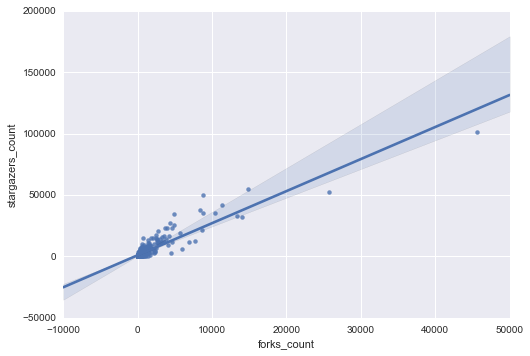

In [60]:
sns.regplot(x='forks_count', y='stargazers_count', data=repos_static)

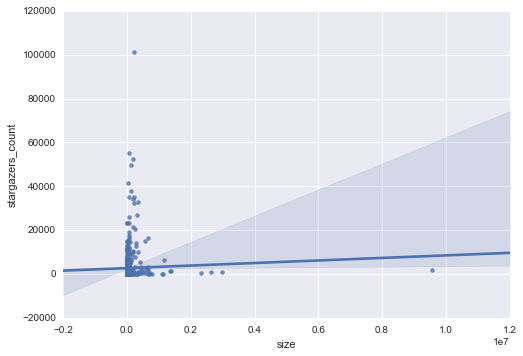

In [61]:
sns.regplot(x='size', y='stargazers_count', data=repos_static)

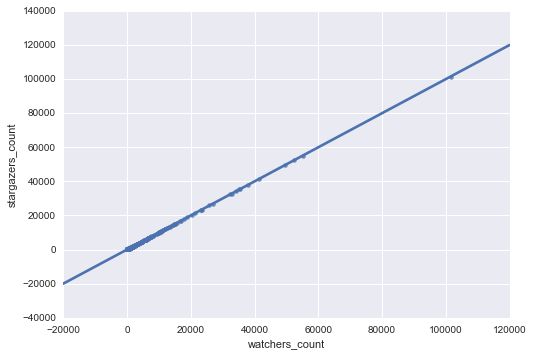

In [62]:
sns.regplot(x='watchers_count', y='stargazers_count', data=repos_static)

- watchers_count has a clear linear relationship with total stargazers
- fork_count has a nominal linear relationship with toal stargazers

### Compare categorical features with total starrings

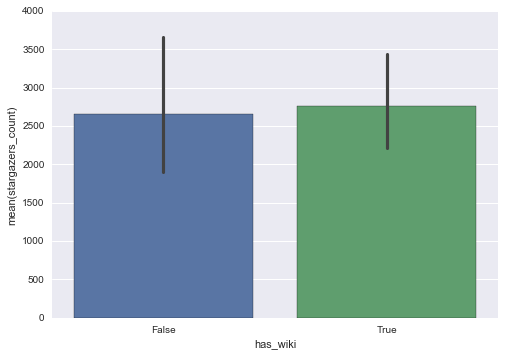

In [63]:
sns.barplot(x='has_wiki', y='stargazers_count', data=repos_static)

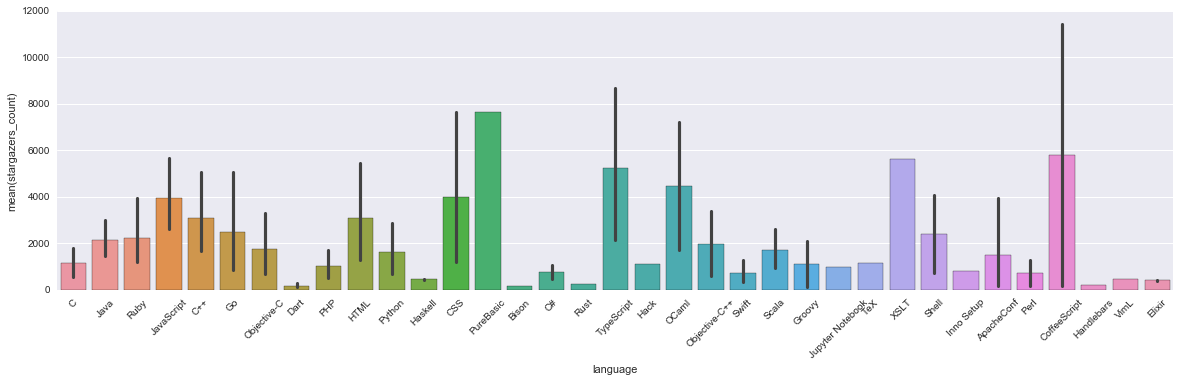

In [64]:
plt.figure(figsize=(20,5))
g = sns.barplot(x='language', y='stargazers_count', data=repos_static)
for item in g.get_xticklabels():
    item.set_rotation(45)

### Compare static attributes with median starring growth

In [65]:
weights_stargrowth = repo_weights.merge(starrings_full50_growth_mean, on=['repo'], how='inner')

In [66]:
weights_stargrowth.tail()

,repo,weight_followers,weight_stargazers,weight_avg,total_stargazers,owner,growth
695,spark-training,44.731707,62.029851,53.380779,153,databricks,0.000000
696,Front-end-Developer-Interview-Questions,7401.878049,7856.641791,7629.259920,23079,h5bp,1.780000
697,redux,7809.829268,8354.283582,8082.056425,23424,reactjs,5.060000
698,mobile-boilerplate,1429.487805,1399.208955,1414.348380,3963,h5bp,0.040816
699,open-graph-protocol,127.512195,124.074627,125.793411,266,facebook,0.000000


In [78]:
weights_stargrowth_static = weights_stargrowth.merge(repos_static, left_on=['owner', 'repo'], right_on=['org_id', 'name'], how='inner')

In [80]:
weights_stargrowth_static.head()

,repo,weight_followers,weight_stargazers,weight_avg,total_stargazers,owner,growth,org_id,repo_id,name,...,forks_count,size,has_issues,has_wiki,language,stargazers_count,watchers_count,created_at,updated_at,homepage
0,google-api-java-client,113.097561,151.343284,132.220422,474,google,0.000000,google,25881432,google-api-java-client,...,281,11784,True,False,Java,475,475,2014-10-28 17:31:34,2016-09-22 23:51:48,https://developers.google.com/api-client-libra...
1,distributedlog,768.658537,812.567164,790.612850,2009,twitter,-68.526316,twitter,50056934,distributedlog,...,229,8109,True,True,Java,2007,2007,2016-01-20 20:07:32,2016-09-22 13:56:23,http://distributedlog.io
2,shoulda-matchers,763.243902,791.223881,777.233892,1783,thoughtbot,0.100000,thoughtbot,1172597,shoulda-matchers,...,521,14641,True,True,Ruby,1784,1784,2010-12-15 22:41:52,2016-09-22 18:47:55,http://matchers.shoulda.io
3,fathom,588.243902,566.985075,577.614489,1277,mozilla,0.333333,mozilla,54228300,fathom,...,47,165,True,True,JavaScript,1273,1273,2016-03-18 20:03:05,2016-09-22 21:21:31,https://www.npmjs.com/package/fathom-web
4,Tropos,521.414634,553.328358,537.371496,1332,thoughtbot,0.060000,thoughtbot,27887352,Tropos,...,190,1361,True,False,Objective-C,1336,1336,2014-12-11 19:16:06,2016-09-23 01:46:02,troposweather.com


In [87]:
weights_stargrowth_static.to_csv('./data/starrings_summary.csv', index=False)